### **Terrorism Hotspots**

### *The data we are using in this project is from the Global Terrorism Database (GTD) - an open-source database including information on terrorist attacks around the world from 1970 through 2020. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 200,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.*

##### Data Source : https://www.start.umd.edu/gtd/

### **STEP 1: Import data**

In [1]:
import pandas as pd
terr_data = pd.read_excel("globalterrorismdb_0522dist.xlsx")

In [2]:
terr_data.sample(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
129701,201404020012,2014,4,2,NaN,0,NaT,60,Egypt,10,...,NaN,"""Two Groups Claim Responsibility For Cairo Uni...","""Cairo bombings revenge for police 'harassment...","""Little-known jihadist group claims Cairo bomb...",START Primary Collection,0,1,0,1,"201404020008, 201404020010, 201404020011, 2014..."
69158,199907080005,1999,7,8,NaN,0,NaT,34,Burundi,11,...,NaN,"""Burundi: 1 Dead, 3 Wounded in Rebel Attack Ne...",NaN,NaN,CETIS,-9,-9,0,-9,NaN
55974,199404170010,1994,4,17,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
124960,201312220007,2013,12,22,NaN,0,NaT,182,Somalia,11,...,NaN,"""Staff of Somali presidential palace said kill...","""SOCAFRICA: Al-Shabaab Incident Tracker, 22-28...",NaN,START Primary Collection,0,0,0,0,NaN
131234,201405020068,2014,5,2,NaN,1,NaT,92,India,6,...,NaN,"""India: Militant Group Kidnaps Five Gas Statio...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
154692,201510200002,2015,10,18,NaN,0,NaT,153,Pakistan,6,...,NaN,"""Balochistan violence: Three BRA militants, 2 ...","""Highlights: Pakistan Balochistan Press 20 Oct...","""Highlights: Pakistan Balochistan Press 19 Oct...",START Primary Collection,0,0,0,0,"201510180047, 201510180048, 201510180049, 2015..."
58908,199504010002,1995,4,1,NaN,1,1995-04-24,209,Turkey,10,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
111051,201209200004,2012,9,20,NaN,0,NaT,92,India,6,...,The number of perpetrators differed according ...,"""Maoists kill BJD ward member,"" Press Trust of...","""Maoists kill ward member in Nabarangpur,"" The...","""Maoists kill ward member in Nabarangpur,"" The...",START Primary Collection,0,0,0,0,NaN
175002,201704190045,2017,4,19,"April 16-22, 2017",0,NaT,4,Afghanistan,6,...,There is doubt that this incident meets terror...,"""Paper fears repetition of sectarian clashes i...",NaN,NaN,START Primary Collection,0,1,0,1,NaN
150565,201507090040,2015,7,9,NaN,0,NaT,95,Iraq,10,...,NaN,"""Bombs kill 16 in Baghdad, Iraqi town; Islamic...","""At least 16 Iraqis killed in bombings around ...","""Terrorism: Transcript of ISIL's Al-Bayan Radi...",START Primary Collection,0,1,0,1,NaN


### **STEP 2: Data Transformation and Cleaning**

#### How many rows and columns are we dealing with?

In [3]:
terr_data.shape

(209706, 135)

#### Since there are 135 columns, let's visualize how many null values each column has instead of having it as a list:

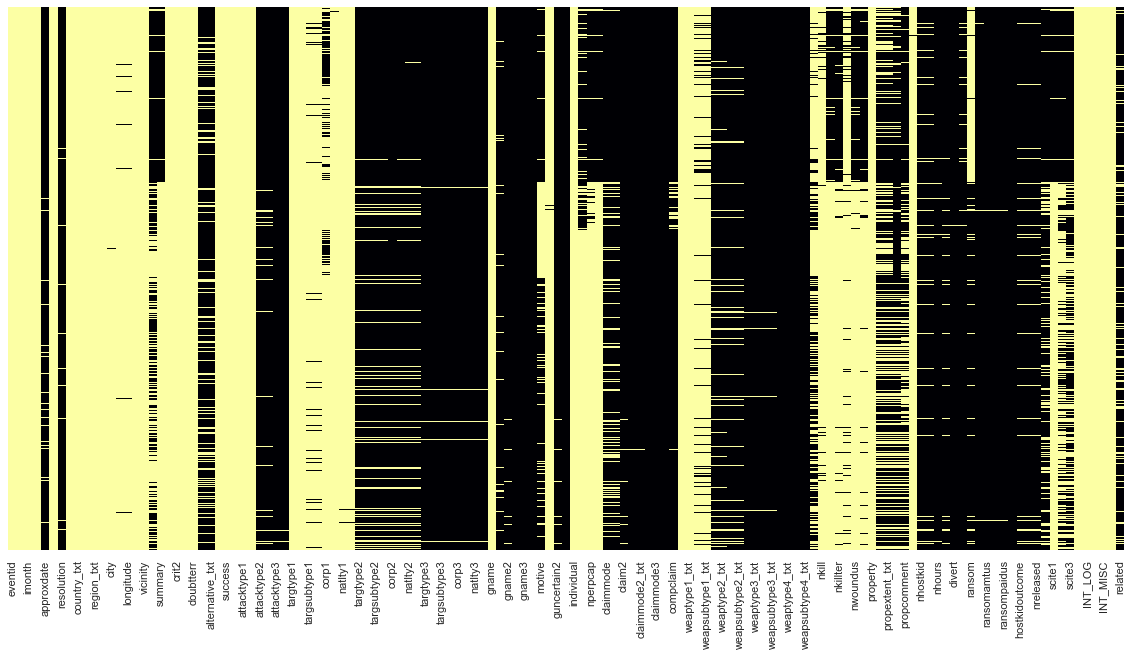

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [20, 10]

sns.heatmap(terr_data.isnull(), yticklabels=False, cbar=False, cmap='inferno_r' );
# Bear in mind that black indicates null.

#### Let's drop the columns that are mostly null:

In [6]:
DROP_THRESHOLD = .75

columns_to_drop = []

for column in terr_data.columns.tolist():
    null_ratio = terr_data[column].isnull().sum() / len(terr_data[column])
    if null_ratio > DROP_THRESHOLD:
        columns_to_drop.append(column)
        print (column, "with null ratio", null_ratio , "will be dropped")

terr_data.drop(columns_to_drop, axis=1, inplace=True)

approxdate with null ratio 0.9394914785461551 will be dropped
resolution with null ratio 0.9768199288527748 will be dropped
alternative with null ratio 0.8319122962623864 will be dropped
alternative_txt with null ratio 0.8319122962623864 will be dropped
attacktype2 with null ratio 0.9597817897437365 will be dropped
attacktype2_txt with null ratio 0.9597817897437365 will be dropped
attacktype3 with null ratio 0.9968622738500568 will be dropped
attacktype3_txt with null ratio 0.9968622738500568 will be dropped
targtype2 with null ratio 0.930688678435524 will be dropped
targtype2_txt with null ratio 0.930688678435524 will be dropped
targsubtype2 with null ratio 0.9332255634078186 will be dropped
targsubtype2_txt with null ratio 0.9332255634078186 will be dropped
corp2 with null ratio 0.9355860108914384 will be dropped
target2 with null ratio 0.9312847510323977 will be dropped
natlty2 with null ratio 0.9322336986066206 will be dropped
natlty2_txt with null ratio 0.9322336986066206 will be 

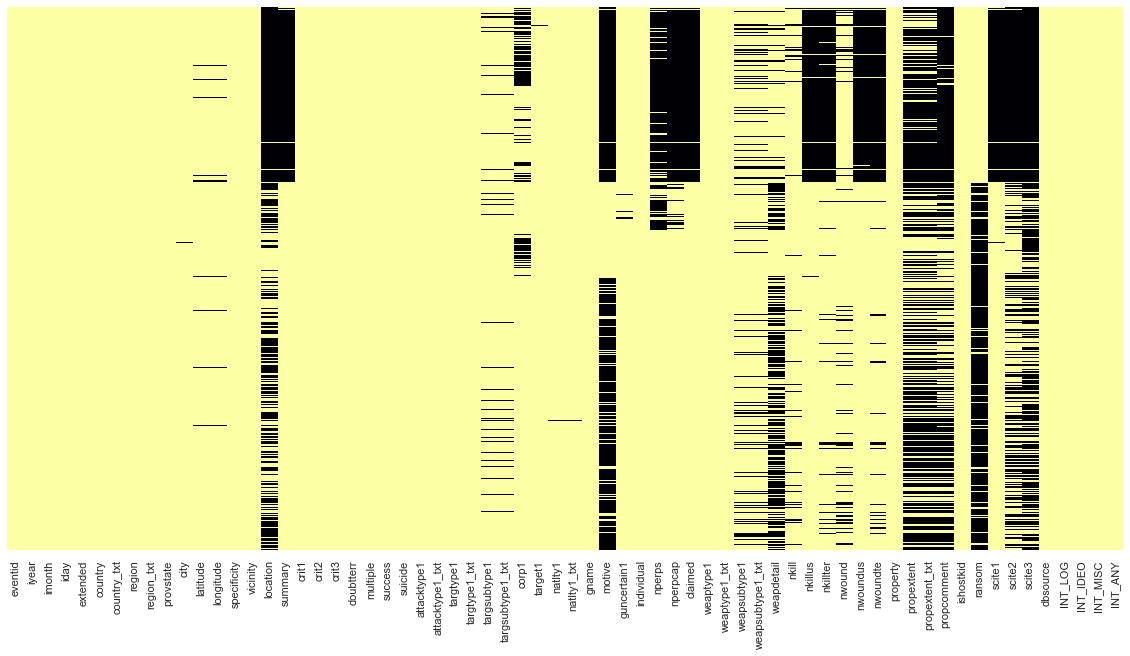

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(terr_data.isnull(), yticklabels=False, cbar=False, cmap='inferno_r' );

#### Before dealing with the rest of the nulls, it's better to subset the columns we need and then clean up.

#### How many columns we have now?

In [8]:
terr_data.shape

(209706, 66)

#### Let's check the remaining 66 columns and choose the subset we are interested in:

In [9]:
terr_data.columns.tolist()

['eventid',
 'iyear',
 'imonth',
 'iday',
 'extended',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'gname',
 'motive',
 'guncertain1',
 'individual',
 'nperps',
 'nperpcap',
 'claimed',
 'weaptype1',
 'weaptype1_txt',
 'weapsubtype1',
 'weapsubtype1_txt',
 'weapdetail',
 'nkill',
 'nkillus',
 'nkillter',
 'nwound',
 'nwoundus',
 'nwoundte',
 'property',
 'propextent',
 'propextent_txt',
 'propcomment',
 'ishostkid',
 'ransom',
 'scite1',
 'scite2',
 'scite3',
 'dbsource',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY']

In [10]:
terr_data = terr_data[['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'doubtterr', 'success',
                       'suicide', 'attacktype1_txt','targtype1_txt','natlty1_txt', 'gname', 'claimed', 'weaptype1_txt', 'nkill',
                       'nkillter', 'nwound','nwoundte']]

terr_data.sample(10)

,eventid,iyear,imonth,iday,country_txt,region_txt,doubtterr,success,suicide,attacktype1_txt,targtype1_txt,natlty1_txt,gname,claimed,weaptype1_txt,nkill,nkillter,nwound,nwoundte
194142,201903010006,2019,3,1,Afghanistan,South Asia,1,1,1,Hostage Taking (Barricade Incident),Military,Afghanistan,Taliban,1.0,Explosives,35.0,9.0,15.0,NaN
208731,202011150006,2020,11,15,Philippines,Southeast Asia,1,0,0,Armed Assault,Military,Philippines,New People's Army (NPA),0.0,Firearms,0.0,0.0,0.0,0.0
186910,201805250018,2018,5,25,India,South Asia,0,1,0,Facility/Infrastructure Attack,Private Citizens & Property,India,Maoists,0.0,Incendiary,0.0,0.0,0.0,0.0
187894,201806270025,2018,6,27,Philippines,Southeast Asia,0,1,0,Armed Assault,Private Citizens & Property,Philippines,New People's Army (NPA),0.0,Firearms,1.0,0.0,0.0,0.0
71705,200101100001,2001,1,10,United Kingdom,Western Europe,0,1,0,Bombing/Explosion,Private Citizens & Property,Great Britain,Animal Liberation Front (ALF),1.0,Explosives,0.0,0.0,0.0,0.0
126287,201401220005,2014,1,22,Somalia,Sub-Saharan Africa,0,1,0,Bombing/Explosion,Terrorists/Non-State Militia,Somalia,Al-Shabaab,0.0,Explosives,NaN,NaN,NaN,NaN
118480,201306260031,2013,6,26,India,South Asia,0,1,0,Bombing/Explosion,Police,India,Maoists,1.0,Explosives,0.0,0.0,0.0,0.0
12787,198102010002,1981,2,1,Peru,South America,0,1,0,Bombing/Explosion,Government (General),Peru,Unknown,NaN,Explosives,0.0,NaN,0.0,NaN
55356,199402280009,1994,2,28,Japan,East Asia,-9,1,0,Assassination,Business,Japan,Unknown,NaN,Melee,1.0,NaN,0.0,NaN
61259,199601010010,1996,1,1,Pakistan,South Asia,-9,1,0,Assassination,Police,Pakistan,Unknown,NaN,Firearms,2.0,NaN,1.0,NaN


In [11]:
terr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          209706 non-null  int64  
 1   iyear            209706 non-null  int64  
 2   imonth           209706 non-null  int64  
 3   iday             209706 non-null  int64  
 4   country_txt      209706 non-null  object 
 5   region_txt       209706 non-null  object 
 6   doubtterr        209706 non-null  int64  
 7   success          209706 non-null  int64  
 8   suicide          209706 non-null  int64  
 9   attacktype1_txt  209706 non-null  object 
 10  targtype1_txt    209706 non-null  object 
 11  natlty1_txt      207692 non-null  object 
 12  gname            209706 non-null  object 
 13  claimed          143613 non-null  float64
 14  weaptype1_txt    209706 non-null  object 
 15  nkill            197179 non-null  float64
 16  nkillter         141547 non-null  floa

#### We have missing data in the columns: natlty1_txt, claimed, nkill, nkillter, nwound, nwoundte. Let's deal with them.

In [12]:
terr_data['natlty1_txt'].fillna('Unknown', inplace=True)
terr_data['claimed'].fillna(0, inplace=True)
terr_data['nkill'].fillna(-1, inplace=True)
terr_data['nkillter'].fillna(-1, inplace=True)
terr_data['nwound'].fillna(-1, inplace=True)
terr_data['nwoundte'].fillna(-1, inplace=True)

In [13]:
terr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          209706 non-null  int64  
 1   iyear            209706 non-null  int64  
 2   imonth           209706 non-null  int64  
 3   iday             209706 non-null  int64  
 4   country_txt      209706 non-null  object 
 5   region_txt       209706 non-null  object 
 6   doubtterr        209706 non-null  int64  
 7   success          209706 non-null  int64  
 8   suicide          209706 non-null  int64  
 9   attacktype1_txt  209706 non-null  object 
 10  targtype1_txt    209706 non-null  object 
 11  natlty1_txt      209706 non-null  object 
 12  gname            209706 non-null  object 
 13  claimed          209706 non-null  float64
 14  weaptype1_txt    209706 non-null  object 
 15  nkill            209706 non-null  float64
 16  nkillter         209706 non-null  floa

In [14]:
terr_data.sample(10)

,eventid,iyear,imonth,iday,country_txt,region_txt,doubtterr,success,suicide,attacktype1_txt,targtype1_txt,natlty1_txt,gname,claimed,weaptype1_txt,nkill,nkillter,nwound,nwoundte
189780,201809050022,2018,9,5,Iraq,Middle East & North Africa,1,0,0,Armed Assault,Military,Iraq,Islamic State of Iraq and the Levant (ISIL),0.0,Firearms,0.0,0.0,-1.0,-1.0
35150,198807190010,1988,7,19,Sri Lanka,South Asia,1,1,0,Bombing/Explosion,Military,India,Unknown,0.0,Explosives,7.0,-1.0,0.0,-1.0
136274,201408080051,2014,8,8,Colombia,South America,0,0,0,Bombing/Explosion,Military,Colombia,Revolutionary Armed Forces of Colombia (FARC),0.0,Explosives,0.0,0.0,0.0,0.0
127080,201402080043,2014,2,8,Iraq,Middle East & North Africa,0,1,0,Bombing/Explosion,Police,Iraq,Unknown,0.0,Explosives,1.0,0.0,3.0,0.0
159321,201602170044,2016,2,17,Sweden,Western Europe,0,1,0,Bombing/Explosion,Private Citizens & Property,Sweden,Unknown,0.0,Explosives,0.0,0.0,0.0,0.0
59950,199507260015,1995,7,26,Germany,Western Europe,0,1,0,Facility/Infrastructure Attack,Business,Turkey,Kurdistan Workers' Party (PKK),0.0,Incendiary,0.0,-1.0,0.0,-1.0
153244,201509120019,2015,9,12,Iraq,Middle East & North Africa,0,1,0,Unknown,Private Citizens & Property,Iraq,Islamic State of Iraq and the Levant (ISIL),0.0,Unknown,18.0,16.0,8.0,0.0
143653,201501270073,2015,1,27,Egypt,Middle East & North Africa,0,0,0,Bombing/Explosion,Police,Egypt,Unknown,0.0,Explosives,0.0,0.0,0.0,0.0
86897,200805140011,2008,5,14,Iraq,Middle East & North Africa,0,1,0,Bombing/Explosion,Private Citizens & Property,Iraq,Unknown,0.0,Explosives,0.0,0.0,3.0,0.0
96639,201005210014,2010,5,21,Pakistan,South Asia,0,1,0,Bombing/Explosion,Business,Pakistan,Tehrik-i-Taliban Pakistan (TTP),1.0,Explosives,0.0,0.0,1.0,0.0


#### Now that we have dealt with nulls let's make the data more readable by doing two things: changing column names, using text instead of numbers in the categorical columns.

In [23]:
# Changing column names:

column_new_names = {'iyear': 'year',
                    'imonth': 'month',
                    'iday': 'day',
                    'country_txt': 'country',
                    'region_txt': 'region',
                    'attacktype1_txt': 'attack_type',
                    'natlty1_txt': 'victim_nationality',
                    'gname': 'group_name',
                    'weaptype1_txt': 'weapon_type',
                    'targtype1_txt': 'target_type'}

terr_data.rename(columns=column_new_names, inplace=True)
terr_data.sample(5)

,eventid,year,month,day,country,region,doubtterr,success,suicide,attack_type,target_type,victim_nationality,group_name,claimed,weapon_type,nkill,nkillter,nwound,nwoundte
187815,201806240032,2018,6,24,Nigeria,Sub-Saharan Africa,1,1,0,Unknown,Military,International,Boko Haram,0.0,Unknown,-1.0,0.0,0.0,0.0
33020,198712310003,1987,12,31,Philippines,Southeast Asia,1,1,0,Armed Assault,Military,Philippines,New People's Army (NPA),0.0,Firearms,11.0,-1.0,0.0,-1.0
49039,199111120002,1991,11,12,India,South Asia,0,0,0,Assassination,Educational Institution,India,Unknown,0.0,Explosives,0.0,-1.0,0.0,-1.0
68996,199906110003,1999,6,11,Algeria,Middle East & North Africa,0,1,0,Armed Assault,Private Citizens & Property,Algeria,Armed Islamic Group (GIA),0.0,Melee,14.0,0.0,1.0,0.0
166884,201608250054,2016,8,25,Iraq,Middle East & North Africa,0,1,0,Bombing/Explosion,Private Citizens & Property,Iraq,Unknown,0.0,Explosives,1.0,0.0,3.0,0.0


In [26]:
# change numerical categories to text:

cat_columns = ['doubtterr', 'success', 'suicide', 'claimed']

for column in cat_columns:
    print(f"The different entries for the column {column} are: {terr_data[column].unique()}")

The different entries for the column doubtterr are: [ 0 -9  1]
The different entries for the column success are: [1 0]
The different entries for the column suicide are: [0 1]
The different entries for the column claimed are: [ 0.  1. -9.]


In [27]:
import numpy as np

conditions = [terr_data['doubtterr'].eq(0), terr_data['doubtterr'].eq(1), terr_data['doubtterr'].eq(-9)]
choices = ['No doubt', 'doubted', 'unknown']
terr_data['doubtterr'] = np.select(conditions, choices)

conditions = [terr_data['success'].eq(1), terr_data['success'].eq(0)]
choices = ['Yes', 'No']
terr_data['success'] = np.select(conditions, choices)

conditions = [terr_data['suicide'].eq(0), terr_data['suicide'].eq(1)]
choices = ['No', 'Yes']
terr_data['suicide'] = np.select(conditions, choices)

conditions = [terr_data['claimed'].eq(0), terr_data['claimed'].eq(1), terr_data['claimed'].eq(-9)]
choices = ['No', 'Yes', 'unkown']
terr_data['claimed'] = np.select(conditions, choices)

terr_data.sample(3)

,eventid,year,month,day,country,region,doubtterr,success,suicide,attack_type,target_type,victim_nationality,group_name,claimed,weapon_type,nkill,nkillter,nwound,nwoundte
118731,201307040030,2013,7,4,Iraq,Middle East & North Africa,No doubt,Yes,No,Armed Assault,Educational Institution,Iraq,Unknown,No,Firearms,2.0,0.0,0.0,0.0
13869,198107140003,1981,7,14,Guatemala,Central America & Caribbean,unknown,Yes,No,Assassination,Business,Guatemala,Unknown,No,Firearms,1.0,-1.0,0.0,-1.0
75266,200303110006,2003,3,11,Afghanistan,South Asia,No doubt,Yes,No,Bombing/Explosion,Government (General),Afghanistan,Unknown,No,Explosives,0.0,0.0,0.0,0.0


In [30]:
# Let's check if the columns which lists that number of killed or injured contains only positive integers and only -1 if unknown

terr_data[terr_data['nkill'] < 0]['nkill'].unique()

array([-1.])

In [31]:
terr_data[terr_data['nkillter'] < 0]['nkillter'].unique()

array([-1.])

In [32]:
terr_data[terr_data['nwound'] < 0]['nwound'].unique()

array([-1.])

In [33]:
terr_data[terr_data['nwoundte'] < 0]['nwoundte'].unique()

array([-1.])

In [35]:
terr_data.dtypes

eventid                 int64
year                    int64
month                   int64
day                     int64
country                object
region                 object
doubtterr              object
success                object
suicide                object
attack_type            object
target_type            object
victim_nationality     object
group_name             object
claimed                object
weapon_type            object
nkill                 float64
nkillter              float64
nwound                float64
nwoundte              float64
dtype: object

In [36]:
# As for the final step in cleaning, fix the datatypes:

terr_data['eventid'] = terr_data['eventid'].astype('object')
terr_data['year'] = terr_data['year'].astype('object')
terr_data['month'] = terr_data['month'].astype('object')
terr_data['day'] = terr_data['day'].astype('object')
terr_data['nkill'] = terr_data['nkill'].astype('int64')
terr_data['nkillter'] = terr_data['nkillter'].astype('int64')
terr_data['nwound'] = terr_data['nwound'].astype('int64')
terr_data['nwoundte'] = terr_data['nwoundte'].astype('int64')

terr_data.sample(3)

,eventid,year,month,day,country,region,doubtterr,success,suicide,attack_type,target_type,victim_nationality,group_name,claimed,weapon_type,nkill,nkillter,nwound,nwoundte
88439,200808130010,2008,8,13,Lebanon,Middle East & North Africa,No doubt,Yes,No,Bombing/Explosion,Transportation,Lebanon,Unknown,No,Explosives,18,0,43,0
30492,198703190003,1987,3,19,Colombia,South America,No doubt,Yes,No,Bombing/Explosion,Utilities,Colombia,National Liberation Army of Colombia (ELN),No,Explosives,-1,-1,-1,-1
36294,198811200007,1988,11,20,India,South Asia,unknown,Yes,No,Armed Assault,Private Citizens & Property,India,Unknown,No,Firearms,9,-1,5,-1


#### Save the updated dataframe as a csv file so we can later use it in Tableau.

In [37]:
terr_data.to_csv('terr_data.csv')

### **STEP 3: Data Exploration**

#### Question 1: How many terror attacks happened in each country?

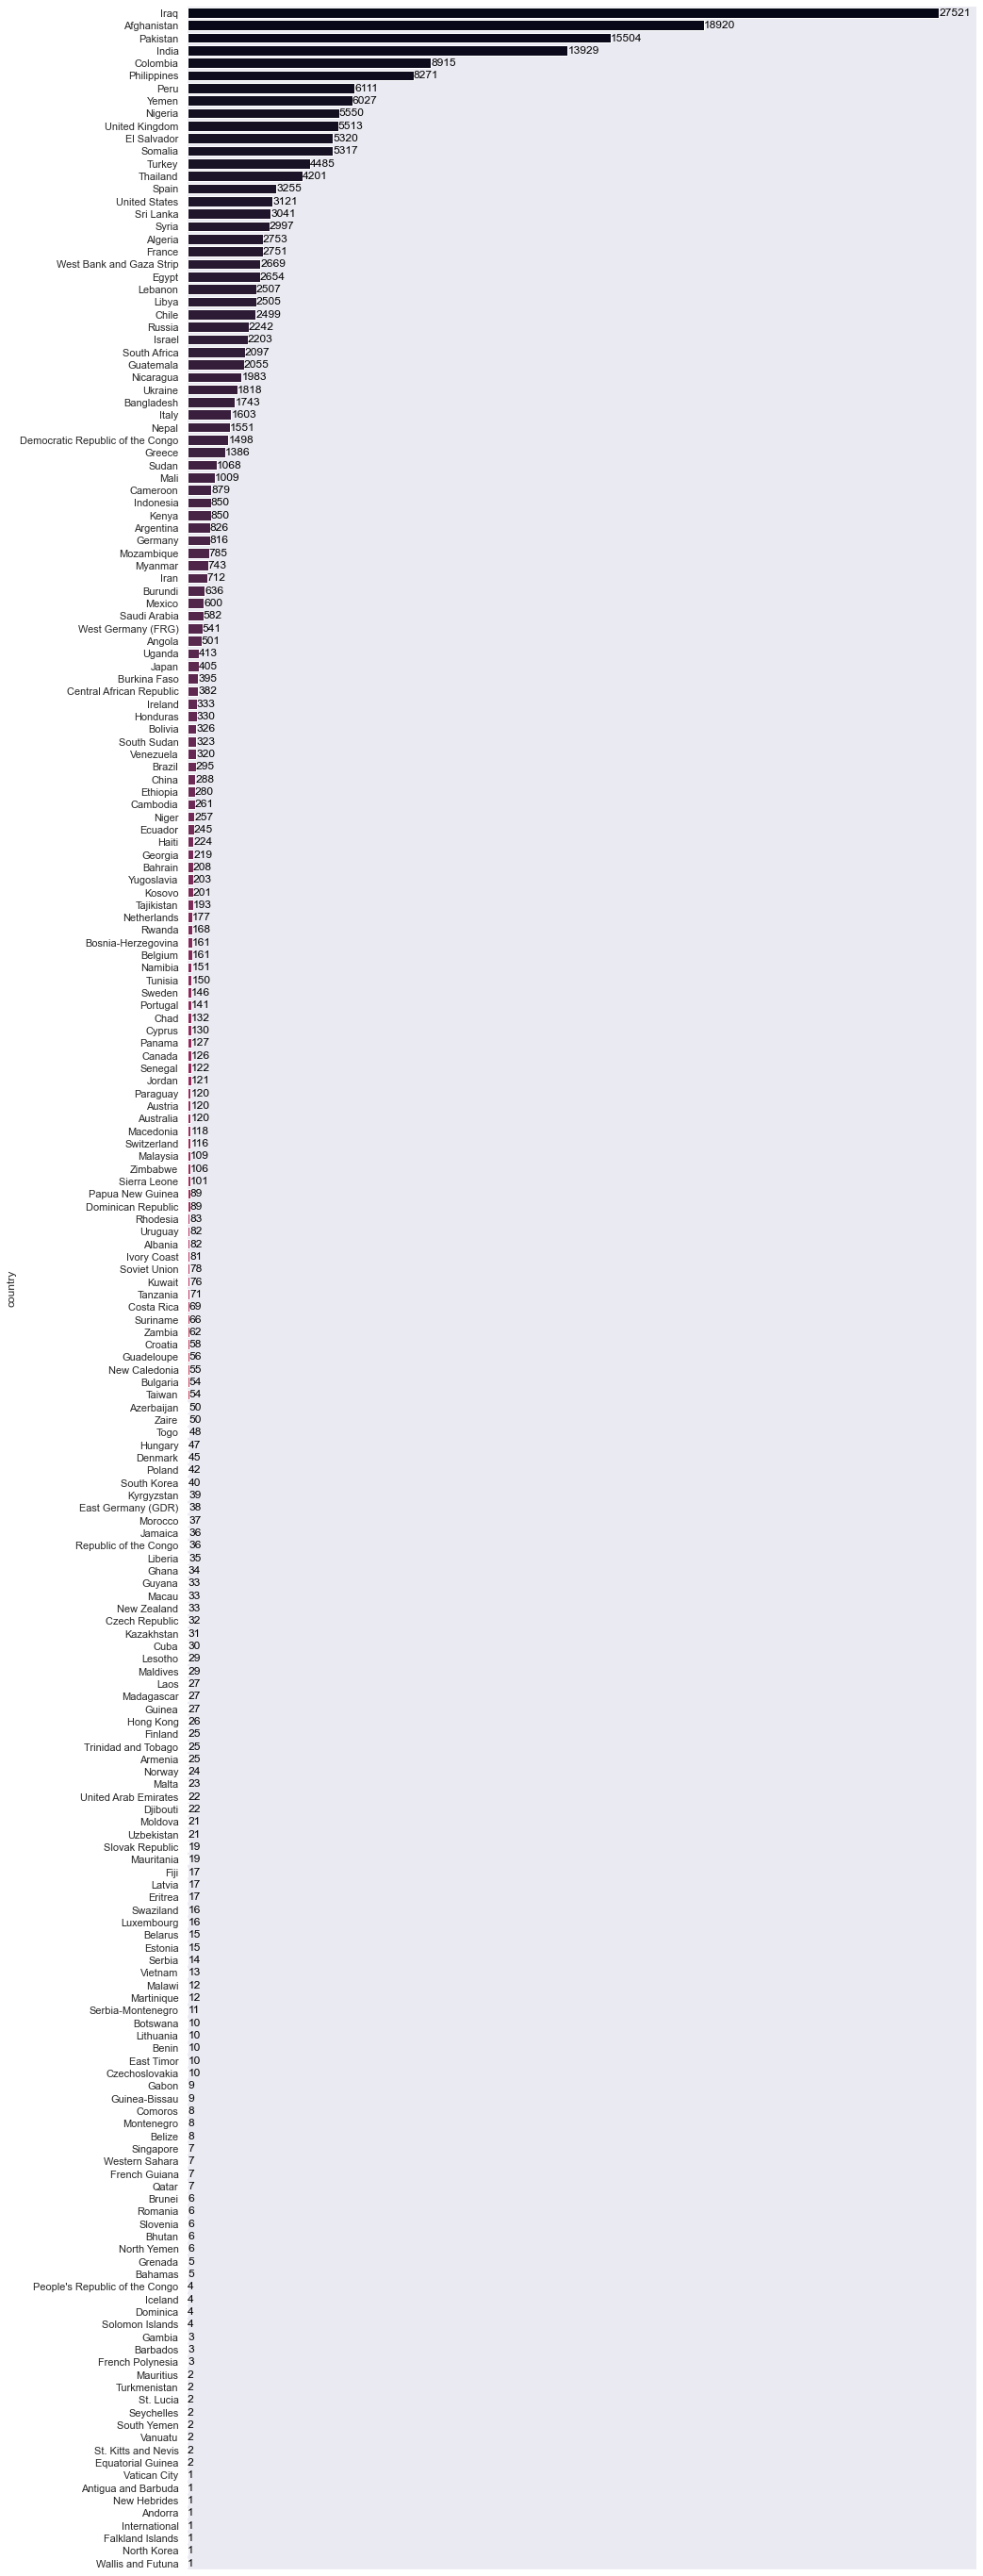

In [95]:
plt.figure(figsize=(15,50))
ax = sns.countplot(y=terr_data["country"], order = terr_data['country'].value_counts().index, dodge=False, palette='rocket');
ax.get_xaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
for label in ax.containers:
    ax.bar_label(label);
ax;

#### Question 2: How did the number of attacks change with years?

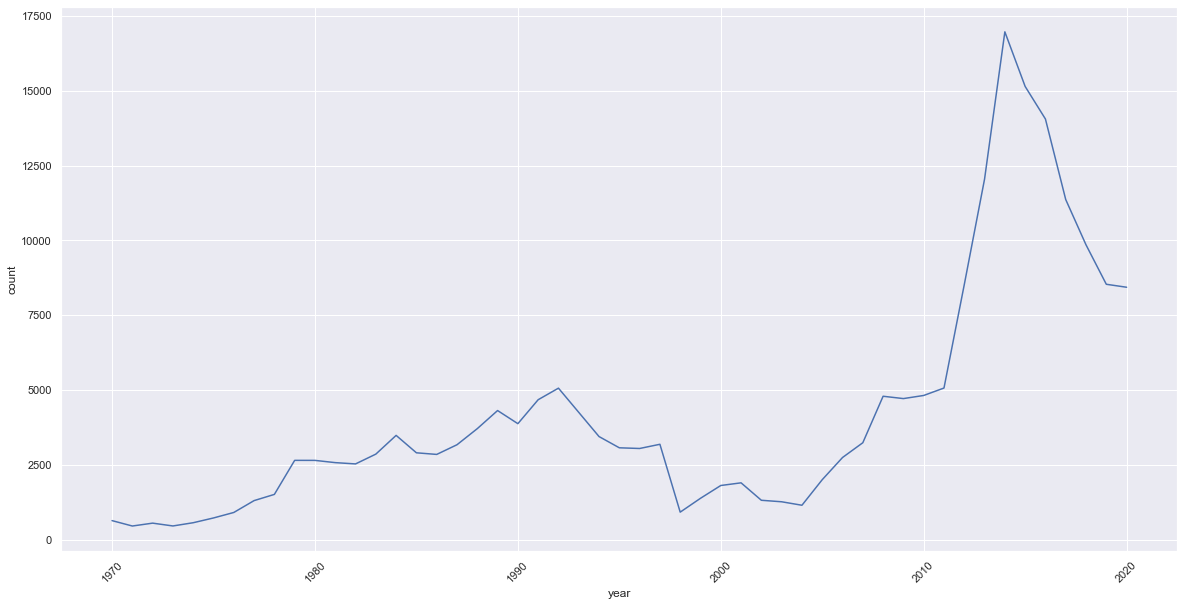

In [97]:
year_df = terr_data.groupby(["year"])["eventid"].count().reset_index(name="count")

ax = sns.lineplot(data=year_df, x='year',y="count");

plt.xticks(rotation = 45)

for label in ax.containers:
    ax.bar_label(label);
ax;

#### Question 3: What percent of attacks were successful?

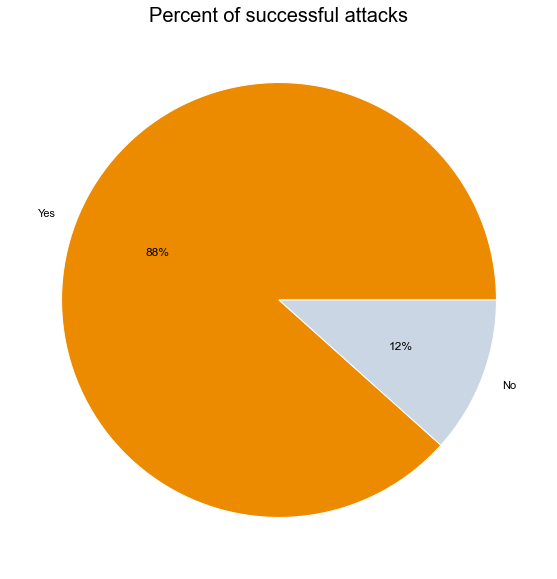

In [93]:
names = terr_data['success'].value_counts().index
size = terr_data['success'].value_counts()

plt.pie(size, labels=names, autopct='%.0f%%', colors=['#ED8B00', "#cbd6e4"]);
plt.title('Percent of successful attacks', size=20);

#### Question 4: What were the types of attacks?

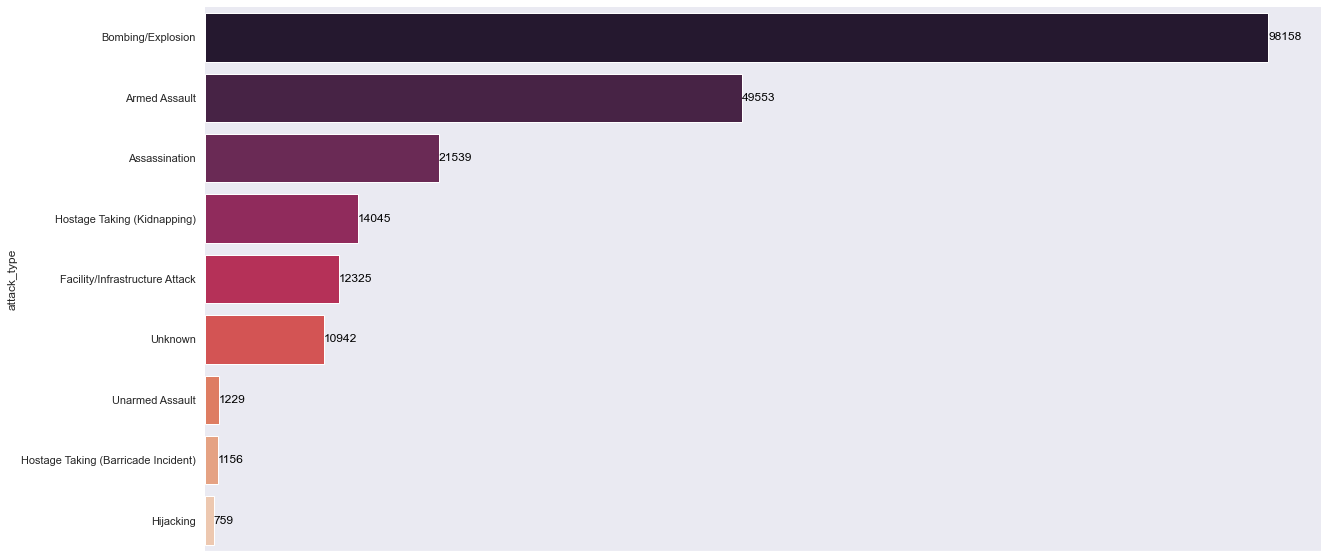

In [98]:
ax = sns.countplot(y=terr_data["attack_type"], order = terr_data['attack_type'].value_counts().index, dodge=False, palette='rocket');
ax.get_xaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
for label in ax.containers:
    ax.bar_label(label);
ax;

#### Question 5: What were the types of weapons used?

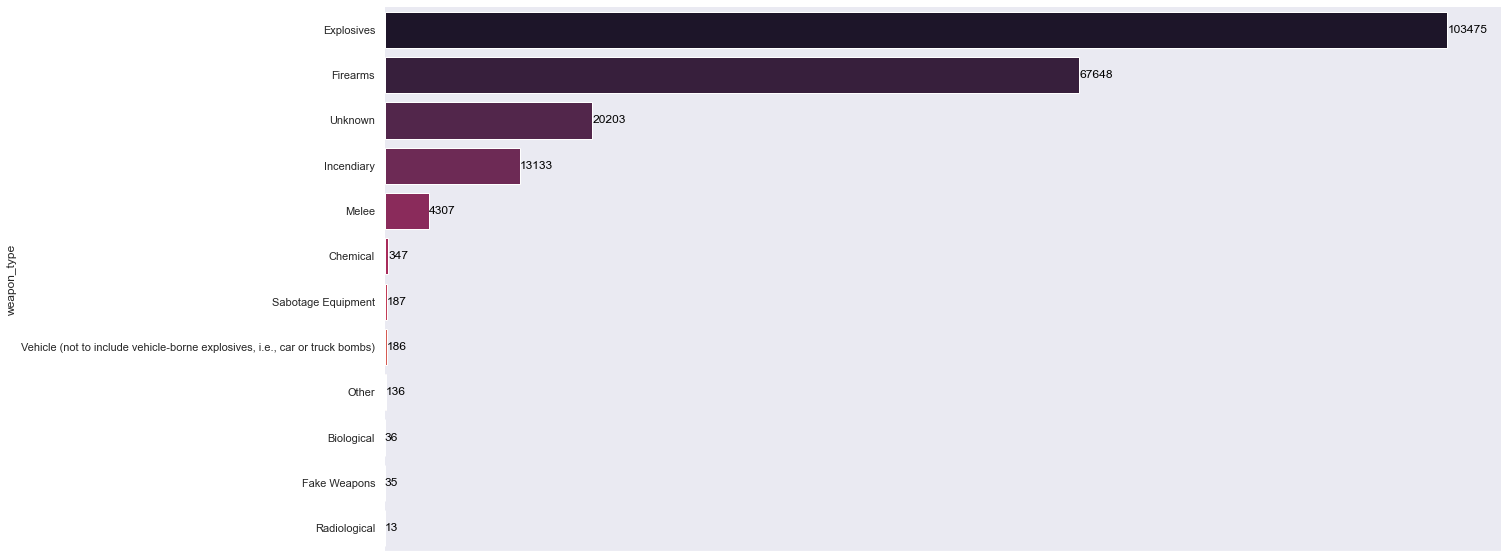

In [99]:
ax = sns.countplot(y=terr_data["weapon_type"], order = terr_data['weapon_type'].value_counts().index, dodge=False, palette='rocket');
ax.get_xaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
for label in ax.containers:
    ax.bar_label(label);
ax;

#### Question 6: How many victims were killed in each region?

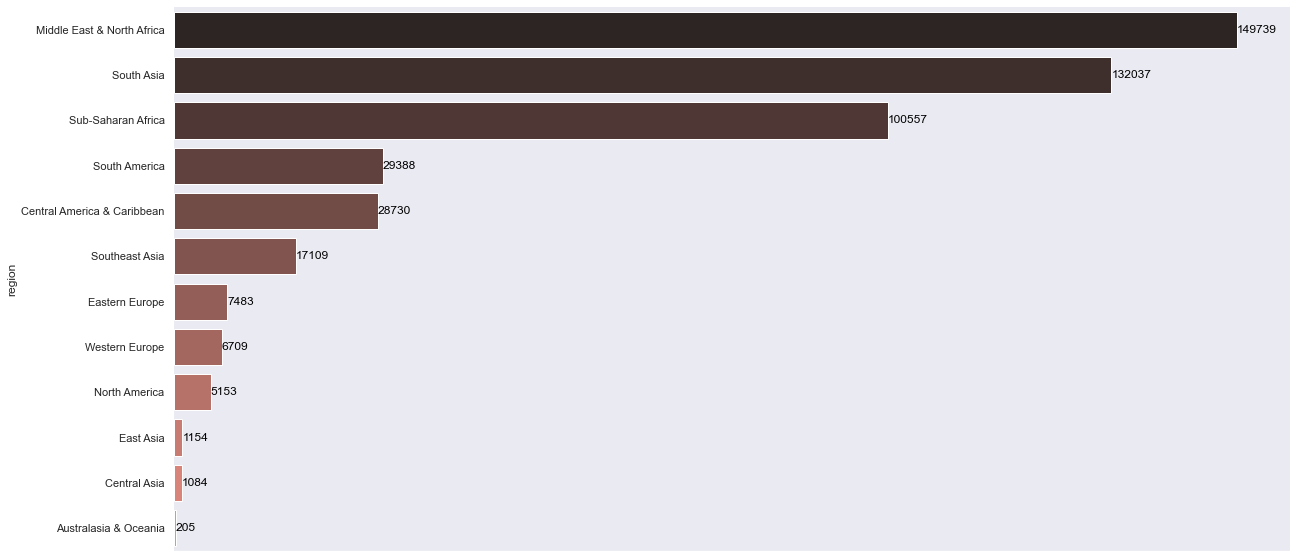

In [119]:
filtered_terr = terr_data[terr_data['nkill']>0]
region_victims_df = filtered_terr.groupby(["region"])["nkill"].sum().reset_index(name="victims")
region_victims_df.sort_values(by='victims', ascending=False, inplace=True)

ax = sns.barplot(data=region_victims_df, y='region', x='victims', palette='dark:salmon');
ax.get_xaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
for label in ax.containers:
    ax.bar_label(label);
ax;

#### Question 7: what nationalities were the victims?

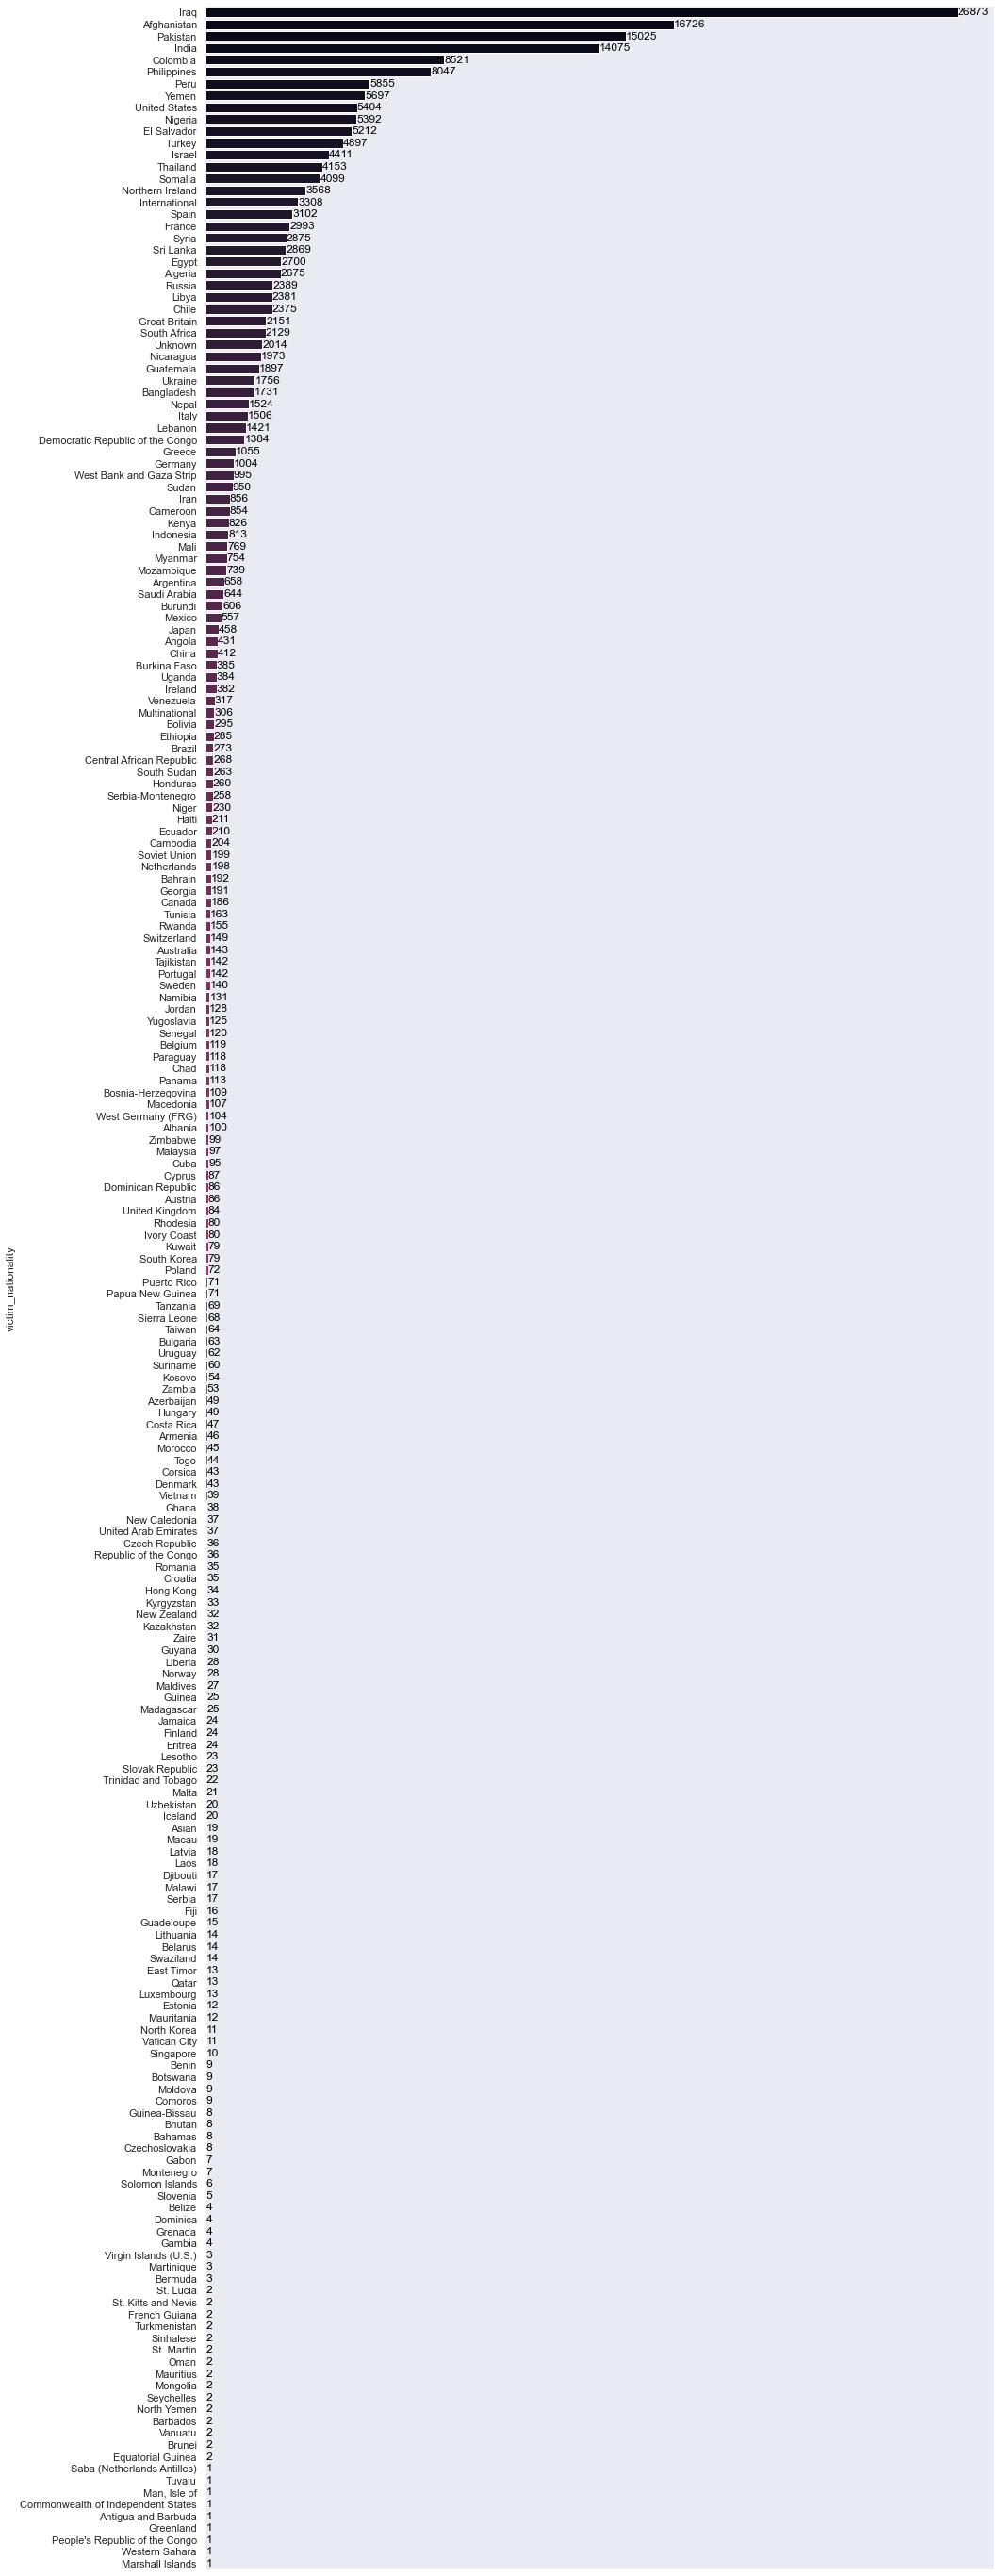

In [117]:
plt.figure(figsize=(15,50))

ax = sns.countplot(y=terr_data["victim_nationality"], order = terr_data['victim_nationality'].value_counts().index, dodge=False, palette='rocket');
ax.get_xaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
for label in ax.containers:
    ax.bar_label(label);
ax;

#### Question 8: Which kind of victims were targeted ?

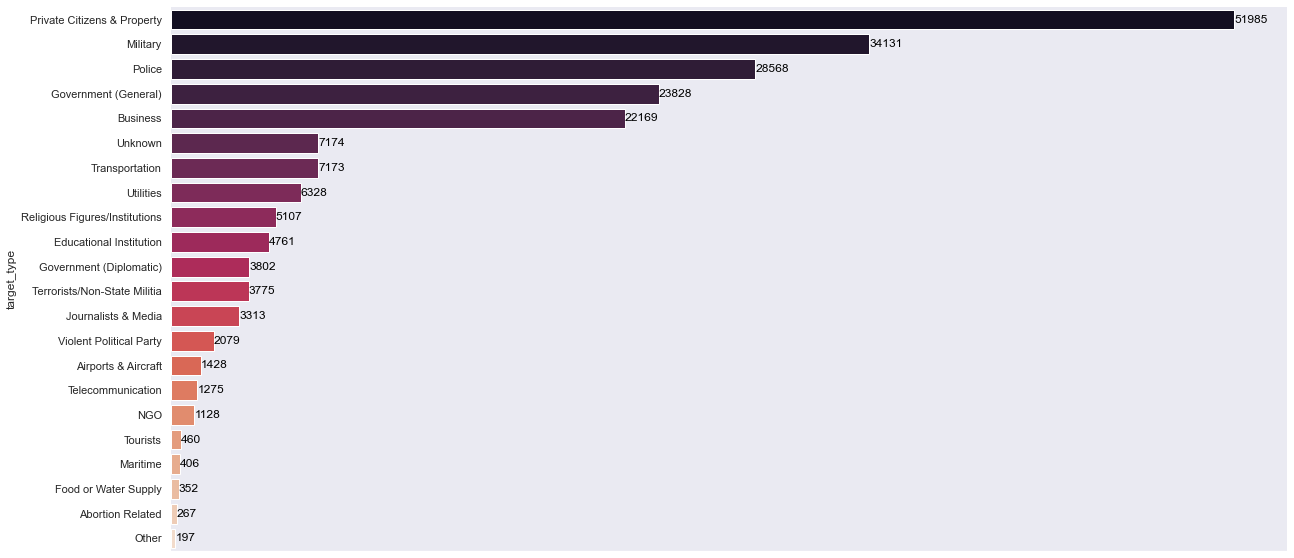

In [121]:
ax = sns.countplot(y=terr_data["target_type"], order = terr_data['target_type'].value_counts().index, dodge=False, palette='rocket');
ax.get_xaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
for label in ax.containers:
    ax.bar_label(label);
ax;

### That was about it, you can think of many more quesrions with combinations of columns, but I will do that In Tableau. 
### See you on the other side, nah, not that one, yet.